#Import Image

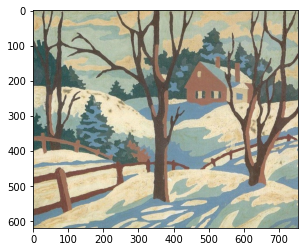

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
img = cv2.imread("img.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # to RGB Image
img = np.array(img, dtype=np.float64) / 255
plt.imshow(img)

In [ ]:
w, h, d = original_shape = tuple(img.shape)
print(w, h, d)

620 754 3


In [ ]:
img = np.reshape(img, (w * h, d))

In [ ]:
img.shape

(467480, 3)

#Modeling

In [ ]:
bit_of_color = 10 # เปลี่ยน k
kmeans = KMeans(n_clusters=bit_of_color, random_state=0).fit(img) # Learning Model
labels = kmeans.predict(img) 
kmeans.labels_ # แสดง label ของรูปภาพ

array([8, 8, 8, ..., 6, 6, 6], dtype=int32)

In [ ]:
image = np.zeros((w, h, d)) # สร้างรูปเสมือนขึ้นมาให้มีขนาดกว้าง ยาว สูง มิติเท่ากัน และให้แทนด้วยเลข 0
mean_ = kmeans.cluster_centers_
d = mean_.shape[1]
mean_[1] # ดูขนาดของสีตัวที่ 1

array([0.32205333, 0.39946689, 0.38339674])

In [ ]:
def adjust_image(mean_color_from_model, labels, w, h): # Function สำหรับการเติมสีในรูปภาพใหม่ที่ได้มาจาก Model K-mean
    d = mean_color_from_model.shape[1]
    print(mean_color_from_model.shape)
    image = np.zeros((w, h, d)) # สร้างรูปเสมือนขึ้นมาให้มีขนาดกว้าง ยาว สูง มิติเท่ากัน และให้แทนด้วยเลข 0
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = mean_color_from_model[labels[label_idx]] # 3 มิติ RGB
            # print(image[i][j])
            label_idx += 1
    print(label_idx)
    return image

ผลลัพธ์สีของภาพที่ได้จาก Model เมื่อกำหนดค่า k = 10

(10, 3)
467480


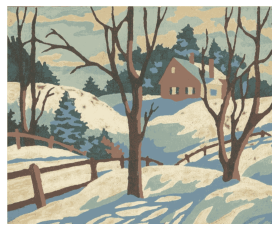

In [ ]:
# plt.figure(1) # create figle
# plt.clf() # clear figle
plt.axis('off')
img_kmean = adjust_image(kmeans.cluster_centers_, labels, w, h)
plt.imshow(img_kmean)

In [ ]:
mean_color = kmeans.cluster_centers_
print(mean_color) # แสดงค่าสี RGB ทั้ง 10 ตัวที่ได้มาจาก Model K-mean

[[0.71098402 0.75229802 0.67624574]
 [0.32205333 0.39946689 0.38339674]
 [0.60933094 0.67628604 0.62332382]
 [0.88510135 0.83774503 0.70494957]
 [0.59306488 0.46204921 0.38964417]
 [0.28101545 0.28412581 0.25267064]
 [0.46719415 0.57472109 0.62822378]
 [0.8300725  0.75571311 0.5923947 ]
 [0.93953235 0.90250394 0.78928514]
 [0.40719377 0.32809331 0.2840915 ]]


In [ ]:
print(labels,end='\n\n')
print(mean_color[labels],end='\n\n') # ตรวจสอบดูว่าค่า Labels

[8 8 8 ... 6 6 6]

[[0.93953235 0.90250394 0.78928514]
 [0.93953235 0.90250394 0.78928514]
 [0.93953235 0.90250394 0.78928514]
 ...
 [0.46719415 0.57472109 0.62822378]
 [0.46719415 0.57472109 0.62822378]
 [0.46719415 0.57472109 0.62822378]]



#เปลี่ยนภาพเป็นสีขาวดำ

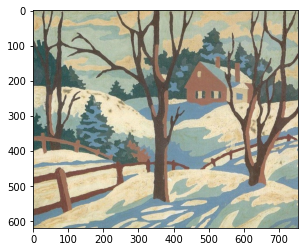

In [ ]:
img = cv2.imread("img.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # to RGB Image
img = np.array(img, dtype=np.float64) / 255
plt.imshow(img)

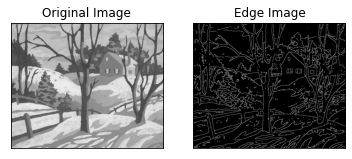

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('img.png',0) # เปิดแบบภาพโทนเทา
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

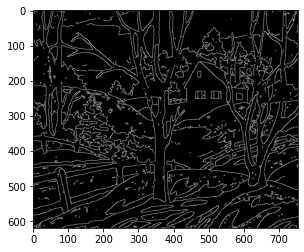

In [ ]:
plt.imshow(edges,cmap = 'gray')
plt.show()

In [ ]:
print(edges.shape,end='\n\n')
print(edges)

(620, 754)

[[  0 255 255 ...   0   0   0]
 [  0 255   0 ... 255 255 255]
 [  0 255 255 ...   0   0   0]
 ...
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 [  0 255   0 ...   0   0   0]]


In [ ]:
y, x = edges.shape
print('x-axis pixel is %d\ny-axis pixel is %d'%(x,y))

x-axis pixel is 754
y-axis pixel is 620


กลับสีบน pixels โดยจะเปลี่ยนจุดสีดำให้เป็นสีขาวและเปลี่ยนจุดสีขาวให้เป็นสีดำ

In [ ]:
for i in range(y):
  for j in range(x):
    if (edges[i][j] == 0):
      edges[i][j] = 255
    elif (edges[i][j] == 255):
      edges[i][j] = 0

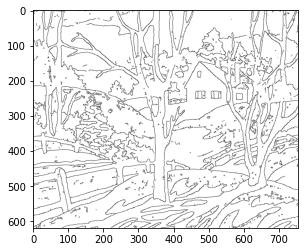

In [ ]:
plt.imshow(edges,cmap = 'gray')
plt.show()

In [ ]:
def plot_color(color, y_, x_):
  im = np.zeros((y_, x_, 3))
  for y in range(y_):
    for x in range(x_):
      if y == 0 or x == 0 or y == (y_-1) or x == (x_-1):
        im[y][x] == 255
      else:
        im[y][x] = color
  return im

#Paint Number

In [ ]:
def put_text(img_plt, text, x, y): # Function สำหรับการเขียนเลขลงบนภาพ
  cv2.putText(
              img_plt, #numpy array on which text is written
              str(text), #text
              (x,y), # x y
              cv2.FONT_HERSHEY_SIMPLEX, #font family
              0.4, #font size
              (0, 0, 0, 0), #font color
              2) #font stroke

In [ ]:
row, col = copy_edge.shape
print(row, col)

620 754


In [ ]:
def check_bool(x, y, size_x, size_y, edges_image): 
  for i in range(y, y + size_y):
    for j in range(x, x+ size_x):
      try:
        if edges_image[j][i] != 255: #if not white
          return False
      except:
        pass
  return True

(-0.5, 753.5, 619.5, -0.5)

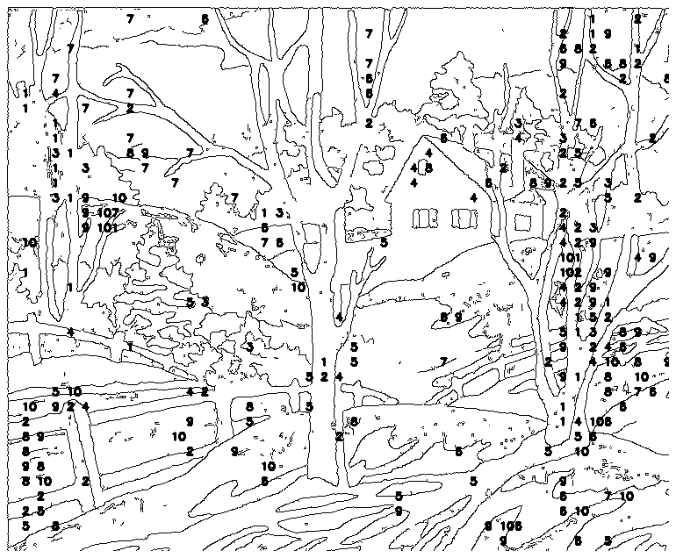

In [ ]:
size_x = 17
size_y = 17
copy_edge = edges.copy()
color_edge = img_kmean.copy()
y, x, d = color_edge.shape
mean_sort = sorted(mean_, key=lambda x: sum(x))

for round in range(len(mean_sort)):
  for y_ in range(0, y, size_y): 
    for x_ in range(0, x, size_x): 
      if sum(color_edge[y_][x_]) == sum(mean_sort[round]): # ถ้าในช่องแรกของกรอบนั้นเป็นสีที่ตรงกับรอบสีในรอบนั้น
        status = check_bool(x_, y_, size_x, size_y, copy_edge) # ถ้า Plot ได้
        if status == True: # Putting text 
          put_text(copy_edge, round+1, x_, y_)
          break
      
plt.figure(figsize = (17,10))
plt.imshow(copy_edge,cmap = 'gray')
plt.axis('off')

# สีของภาพ

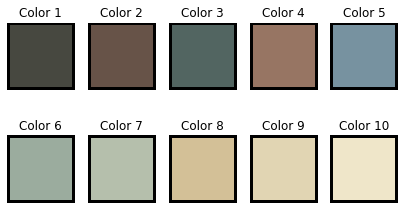

In [ ]:
plt.figure(figsize=(7,10)) # x, y
for i in range(len(mean_sort)):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.title("Color %d"%(i+1)) #, y=-0.26
    plt.imshow(plot_color(mean_sort[i], 20, 20))
    plt.axis('off')
plt.show()